# Drilling Trajectory `F-14`

In [1]:
cd ~/Desktop/Tesis/Notebooks-Git

/home/luis/Desktop/Tesis/Notebooks-Git


In [2]:
import Script as sc

In [3]:
cd ~/Desktop/Tesis/F14/trajectory

/home/luis/Desktop/Tesis/F14/trajectory


In [4]:
ls

1.xml  2.xml  3.xml  4.xml  5.xml  Book1.xlsx  MetaDataFileInfo.txt


In [5]:
import os
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [6]:
files = os.listdir()
files.remove("MetaDataFileInfo.txt")
files.remove("Book1.xlsx")
files

['3.xml', '5.xml', '2.xml', '4.xml', '1.xml']

In [7]:
for file in files:
    sc.read_xml(file)

File :  3.xml

Wellbore name: 15/9-F-14
Wellbore section: MWD Geocervices Real Time Data 26in - Actual Traj
Start date: 2007-12-08T15:18:55.958Z
Final md : 1065.6999768 [m]
Surveys: 17 


File :  5.xml

Wellbore name: 15/9-F-14
Wellbore section: 12 1/4in Section - Actual Traj
Start date: 2008-05-23T13:13:03.994Z
Final md : 2747.1581328 [m]
Surveys: 59 


File :  2.xml

Wellbore name: 15/9-F-14
Wellbore section: 17 1/2in Section. - Actual Traj
Start date: 2008-05-14T09:33:19.958Z
Final md : 2227.4534064 [m]
Surveys: 47 


File :  4.xml

Wellbore name: 15/9-F-14
Wellbore section: 8 1/2 in Section - Actual Traj
Start date: 2008-06-14T14:34:07.968Z
Final md : 3729.8577168 [m]
Surveys: 92 


File :  1.xml

Wellbore name: 15/9-F-14
Wellbore section: Real Time MWD/LWD data - 36in. Section - Actual Traj
Start date: 2007-11-07T04:26:24.029Z
Final md : 184.0998096 [m]
Surveys: 5 




The file `4.xml`has the more depth in its final survey, indicating this should be the one used and the main whole trajectory

In [8]:
traj_wellbore = sc.read_xml(files[3])

File :  4.xml

Wellbore name: 15/9-F-14
Wellbore section: 8 1/2 in Section - Actual Traj
Start date: 2008-06-14T14:34:07.968Z
Final md : 3729.8577168 [m]
Surveys: 92 




In [9]:
traj_wellbore

md          tvd      dispNs      dispEw   incl    azi       dls  \
0    145.899835   145.899835   -1.210056    2.420112   0.00   0.00  0.000000   
1    155.089860   155.089860   -1.195685    2.421476   0.18   5.42  0.019587   
2    195.439894   195.439589   -1.040746    2.498650   0.33  37.78  0.005016   
3    235.799986   235.798157   -0.835734    2.752488   0.61  58.22  0.007979   
4    276.200006   276.190558   -0.470167    3.419976   1.55  62.50  0.023337   
..          ...          ...         ...         ...    ...    ...       ...   
87  3596.234921  3059.530279  320.556822  861.660786  51.69  92.76  0.136588   
88  3638.070550  3086.324028  318.656939  893.727148  48.65  94.05  0.076424   
89  3678.386446  3112.682827  316.609552  924.162966  49.69  93.65  0.026867   
90  3718.835234  3138.720672  314.598419  955.051238  50.17  93.80  0.012201   
91  3729.857717  3145.774049  314.041492  963.503146  50.26  93.74  0.009173   

        neg_tvd  
0   -145.899835  
1   -155.089860  
2   -195.439589  
3   -235.798157  
4   -276.190558  
..          ...  
87 -3059.530279  
88 -3086.324028  
89 -3112.682827  
90 -3138.720672  
91 -3145.774049  

[92 rows x 8 columns]

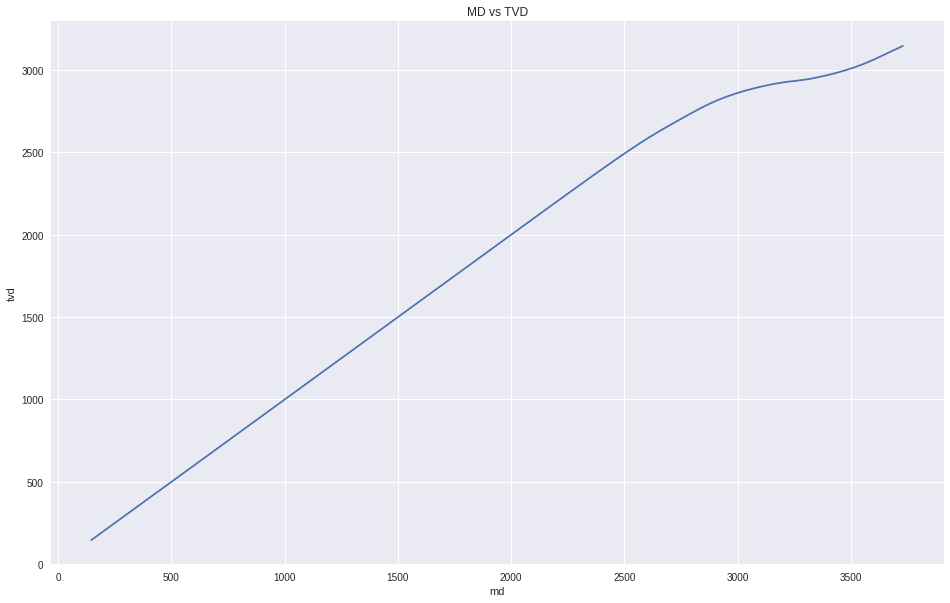

In [10]:
sc.plts_traj(traj_wellbore,"md","tvd","MD vs TVD","")

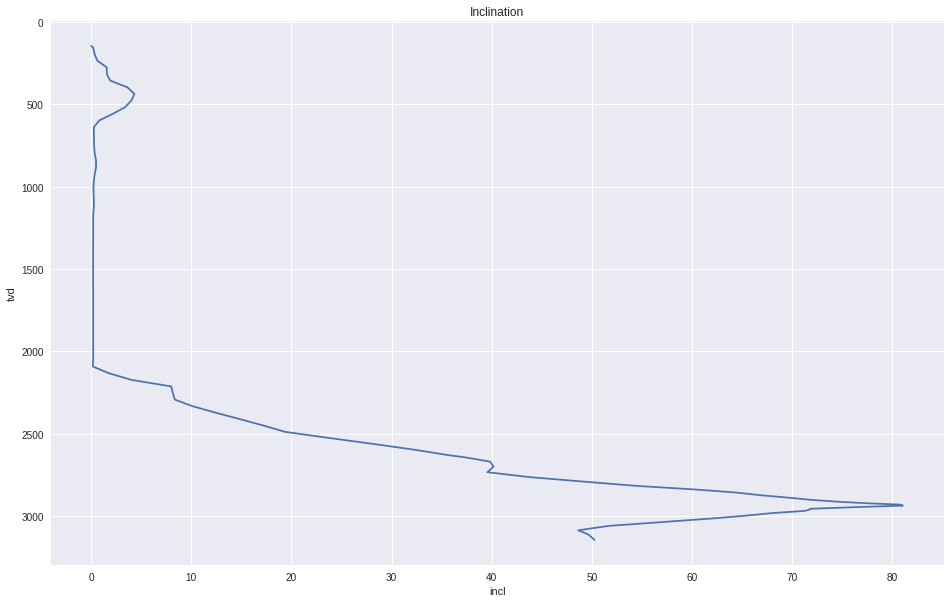

In [11]:
sc.plts_traj(traj_wellbore,"incl","tvd","Inclination","invert")

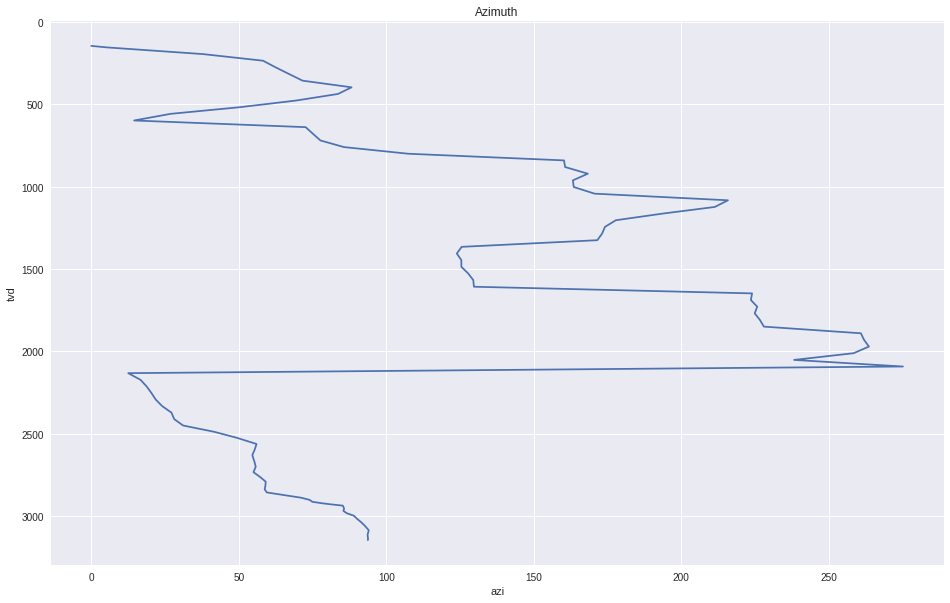

In [12]:
sc.plts_traj(traj_wellbore,"azi","tvd","Azimuth","invert")

In [13]:
traj_wellbore.columns

Index(['md', 'tvd', 'dispNs', 'dispEw', 'incl', 'azi', 'dls', 'neg_tvd'], dtype='object')

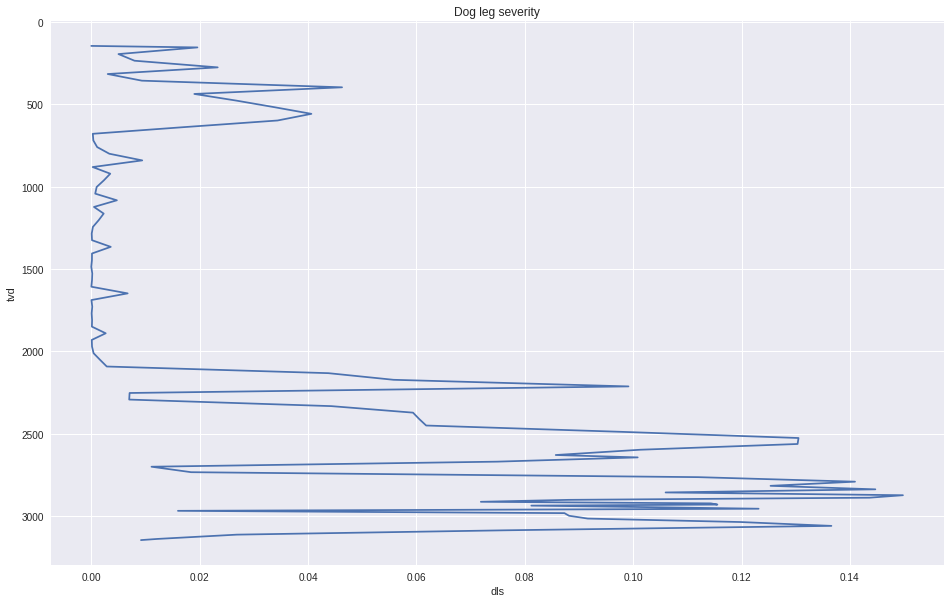

In [14]:
sc.plts_traj(traj_wellbore,"dls","tvd","Dog leg severity","invert")

Maximum rate 0.12° every 30meter
    1700 - 2500 : same rate

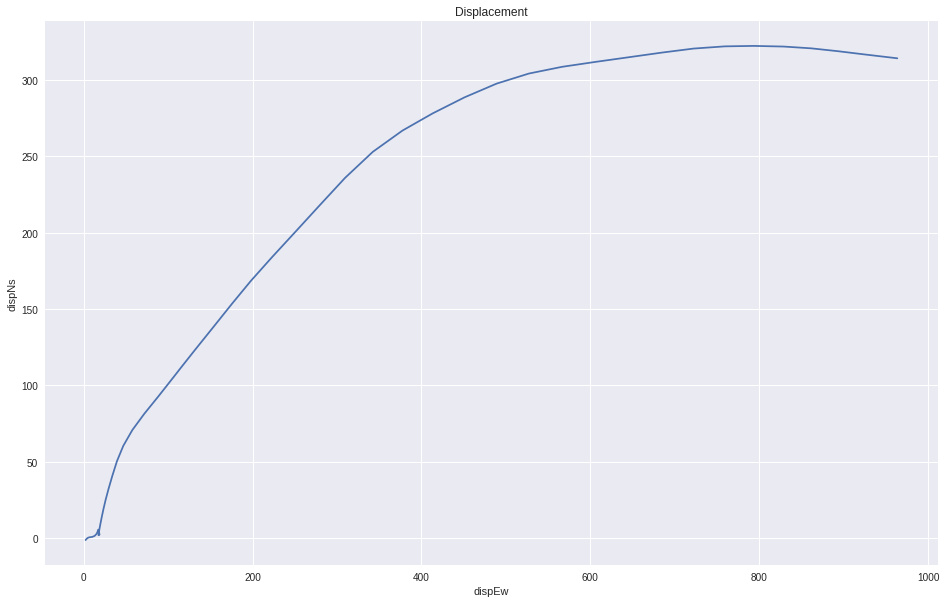

In [15]:
sc.plts_traj(traj_wellbore,"dispEw","dispNs","Displacement","")

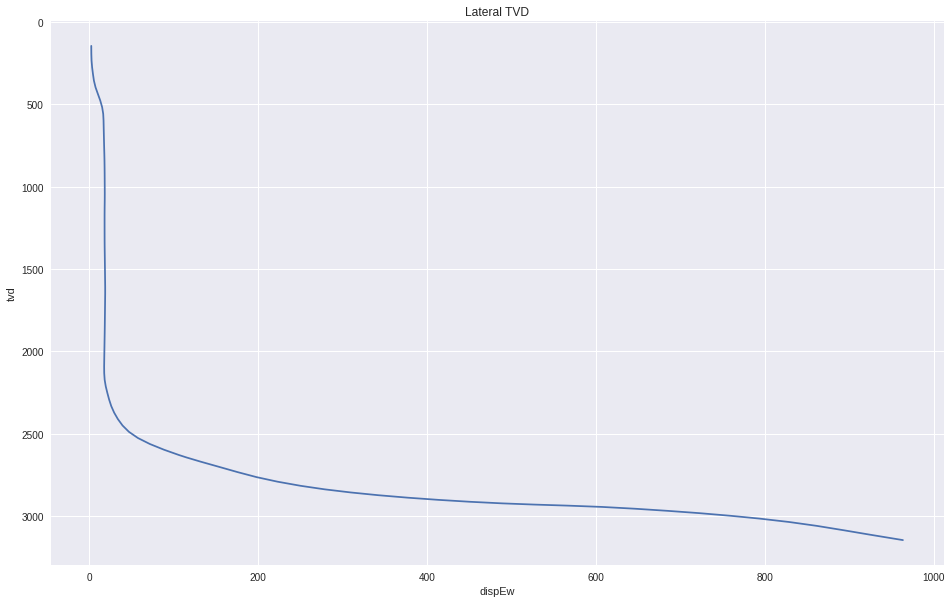

In [16]:
sc.plts_traj(traj_wellbore,"dispEw","tvd","Lateral TVD","invert")

file:///home/luis/Downloads/newplot%20(1).png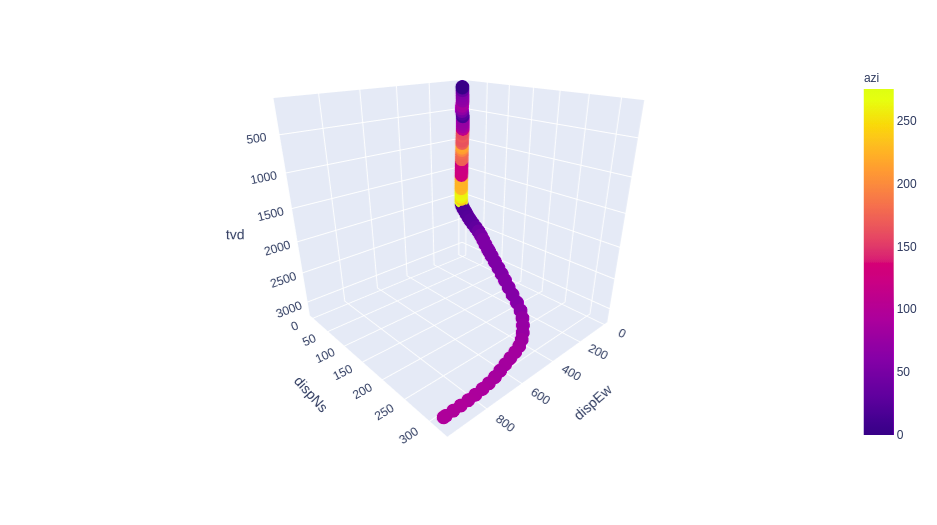

file:///home/luis/Downloads/newplot%20(2).png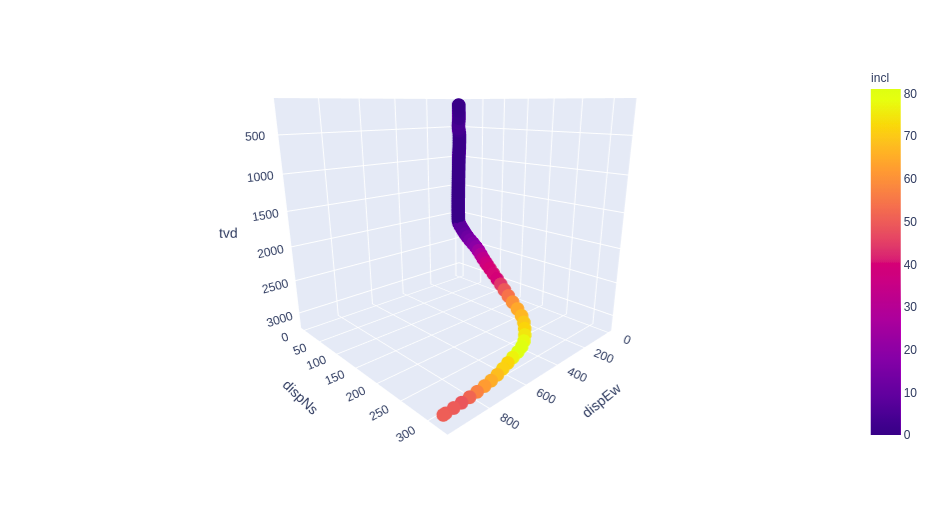

file:///home/luis/Downloads/newplot%20(2).png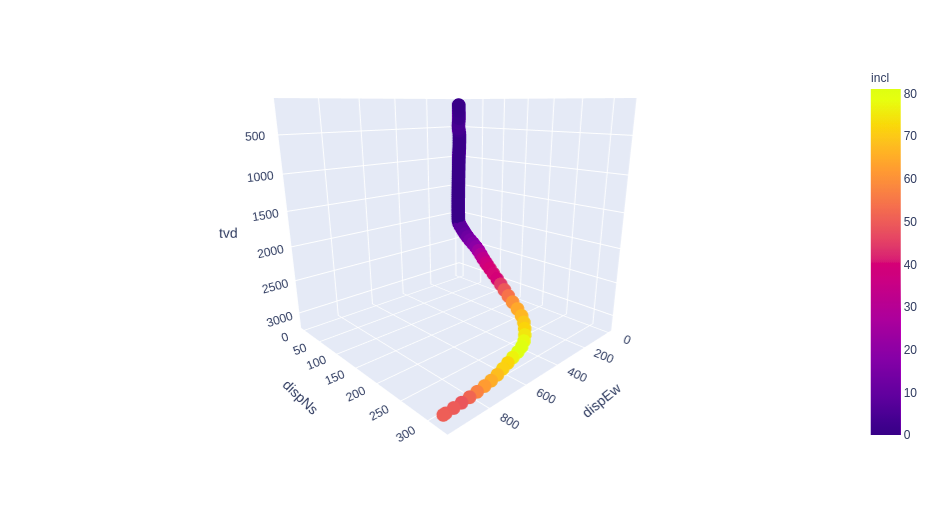

## Planned trajectory against actual

In [17]:
df = pd.read_excel("Book1.xlsx")

In [18]:
df.head()

Empty DataFrame
Columns: [md, incl, azi, tvd, dispNs, dispEw]
Index: []

<Figure size 1000x700 with 0 Axes>

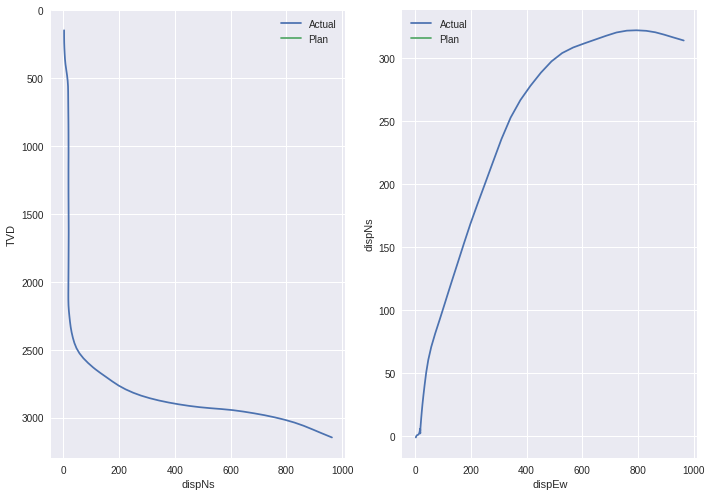

In [19]:
sc.planact_traj(df,traj_wellbore)